In [1]:
import qutip as qt
import numpy as np
from operators_3spin import ThreeSpinOperators, gradient
import pulsee.plot as vis
pi = np.pi

In [2]:
#Golze definies |j_13|<|j_23|
j12 = 10000
j23 = 1
j13 = 1
op = ThreeSpinOperators(j12=j12, j13=j13, j23=j23)

#as j23 approaches j13 temporal average improves
#as j12>>j23>>j13 GHZ averg gets better

### The goal is to go from a thermal state (Rho Thermal) of a 3 qubit system to a pseudo pure state (000) through a process known as pseudo pure state preperation. This form of temporal averaging requires gradient pulses. There are other more complicated methods that do not require gradient pulses (temporal averaging, etc.)

Rho Thermal


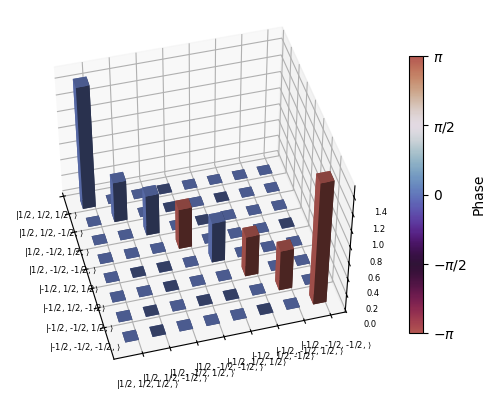

Quantum object: dims = [[2, 2, 2], [2, 2, 2]], shape = (8, 8), type = oper, isherm = True
Qobj data =
[[ 1.5  0.   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.5  0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.5  0.   0.   0.   0.   0. ]
 [ 0.   0.   0.  -0.5  0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.5  0.   0.   0. ]
 [ 0.   0.   0.   0.   0.  -0.5  0.   0. ]
 [ 0.   0.   0.   0.   0.   0.  -0.5  0. ]
 [ 0.   0.   0.   0.   0.   0.   0.  -1.5]]

In [20]:
print("Rho Thermal")
rho_thermal = op.I1z + op.I2z + op.I3z
vis.plot_complex_density_matrix(rho_thermal)
display(rho_thermal)

Rho 10000000


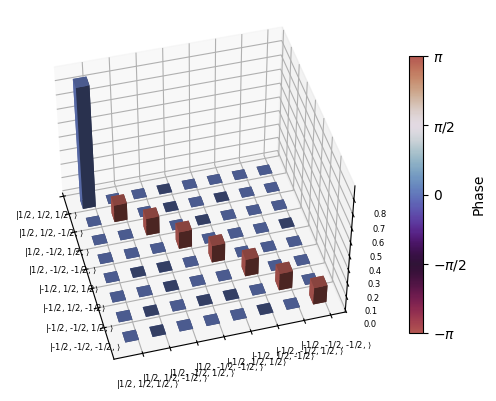

(<Figure size 640x480 with 2 Axes>, <Axes3D: >)

In [4]:
print("Rho 10000000")
rho_theoretical_transformation_15 = 1/4*op.I1z + 1/4*op.I2z + 1/4*op.I3z +1/2*op.I1zI2z+1/2*op.I1zI3z+1/2*op.I2zI3z+1*op.I1zI2zI3z
vis.plot_complex_density_matrix(rho_theoretical_transformation_15)

As outlined in Golze, this can be done by the pulse sequence given in [22].
https://onlinelibrary.wiley.com/doi/epdf/10.1002/cmr.a.21222

## Starting Golze Simulation

Starting state for Simulaiton and Theory


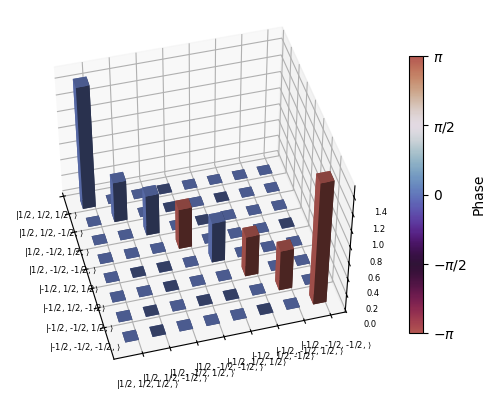

(<Figure size 640x480 with 2 Axes>, <Axes3D: >)

In [5]:
#Initial State. Thermal state for 3 coupled spin 1/2 system
print("Starting state for Simulaiton and Theory")
vis.plot_complex_density_matrix(rho_thermal)

Simulated rho_transformed_3


Quantum object: dims = [[2, 2, 2], [2, 2, 2]], shape = (8, 8), type = oper, isherm = True
Qobj data =
[[ 0.87940952  0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.         -0.12059048  0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.37940952  0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.         -0.62059048  0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.62059048  0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.         -0.37940952
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.12059048  0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.         -0.87940952]]

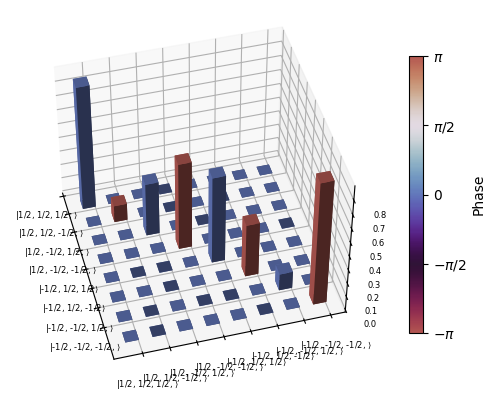

Theoretical rho_transformed_3


Quantum object: dims = [[2, 2, 2], [2, 2, 2]], shape = (8, 8), type = oper, isherm = True
Qobj data =
[[ 0.875  0.     0.     0.     0.     0.     0.     0.   ]
 [ 0.    -0.125  0.     0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.375  0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.    -0.625  0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.     0.625  0.     0.     0.   ]
 [ 0.     0.     0.     0.     0.    -0.375  0.     0.   ]
 [ 0.     0.     0.     0.     0.     0.     0.125  0.   ]
 [ 0.     0.     0.     0.     0.     0.     0.    -0.875]]

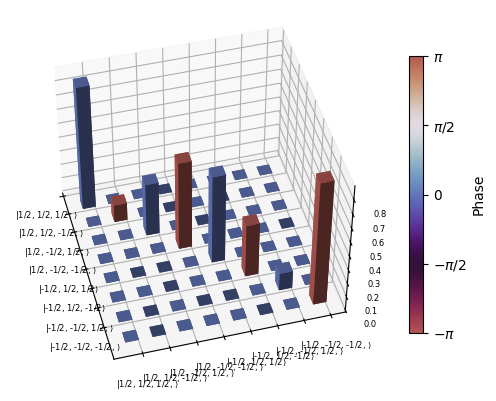

(<Figure size 640x480 with 2 Axes>, <Axes3D: >)

In [6]:
#Step 1 
rho_transformed_1 = rho_thermal.transform(op.rot_1('y', 5*np.pi/12))
rho_transformed_2 = rho_transformed_1.transform(op.rot_2('y', np.pi/3))
rho_transformed_3 = gradient(rho_transformed_2)
print('Simulated rho_transformed_3')
display(rho_transformed_3)
vis.plot_complex_density_matrix(rho_transformed_3)


print('Theoretical rho_transformed_3')
rho_theoretical_transformation_1 = 1/4*op.I1z + +1/2*op.I2z + op.I3z
display(rho_theoretical_transformation_1)
vis.plot_complex_density_matrix(rho_theoretical_transformation_1)

Simulated rho_transformed_7


Quantum object: dims = [[2, 2, 2], [2, 2, 2]], shape = (8, 8), type = oper, isherm = True
Qobj data =
[[ 0.87940952  0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.         -0.12059048  0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.37940952  0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.         -0.62059048  0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.37059048  0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.         -0.62940952
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.37059048  0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.         -0.62940952]]

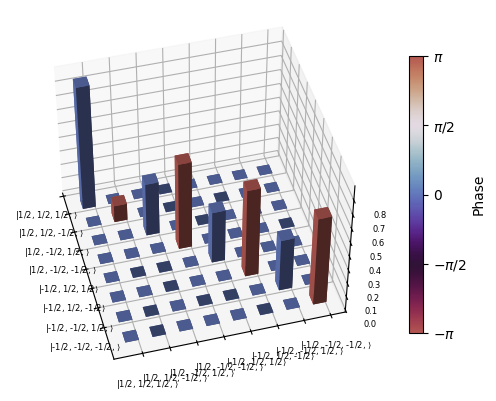

Theoretical rho_transformed_7


Quantum object: dims = [[2, 2, 2], [2, 2, 2]], shape = (8, 8), type = oper, isherm = True
Qobj data =
[[ 0.875  0.     0.     0.     0.     0.     0.     0.   ]
 [ 0.    -0.125  0.     0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.375  0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.    -0.625  0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.     0.375  0.     0.     0.   ]
 [ 0.     0.     0.     0.     0.    -0.625  0.     0.   ]
 [ 0.     0.     0.     0.     0.     0.     0.375  0.   ]
 [ 0.     0.     0.     0.     0.     0.     0.    -0.625]]

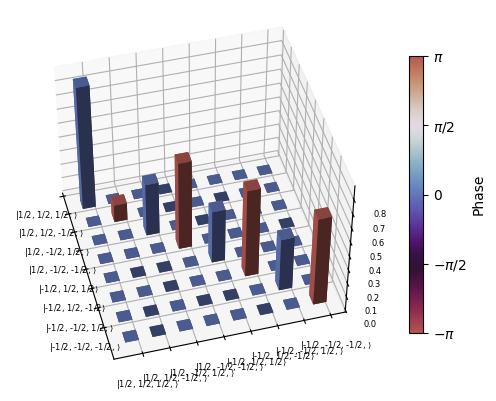

(<Figure size 640x480 with 2 Axes>, <Axes3D: >)

In [7]:
#Step 2
#rho_transformed_4 = rho_theoretical_transformation_1.transform(op.rot_2('y', np.pi/4))
rho_transformed_4 = rho_transformed_3.transform(op.rot_2('y', np.pi/4))
rho_transformed_5 = rho_transformed_4.transform(op.UJ(t = 1 / (2*j12)))
rho_transformed_6 = rho_transformed_5.transform(op.rot_2('x', np.pi/4))
rho_transformed_7 = gradient(rho_transformed_6) #z gradients are modelled by destroying all off-diagonal elements
print('Simulated rho_transformed_7')
display(rho_transformed_7)
vis.plot_complex_density_matrix(rho_transformed_7)



print('Theoretical rho_transformed_7')
rho_theoretical_transformation_7 = 1/4*op.I1z + +1/4*op.I2z + op.I3z +1/2*op.I1zI2z
display(rho_theoretical_transformation_7)
vis.plot_complex_density_matrix(rho_theoretical_transformation_7)

Simulated rho_transformed_11


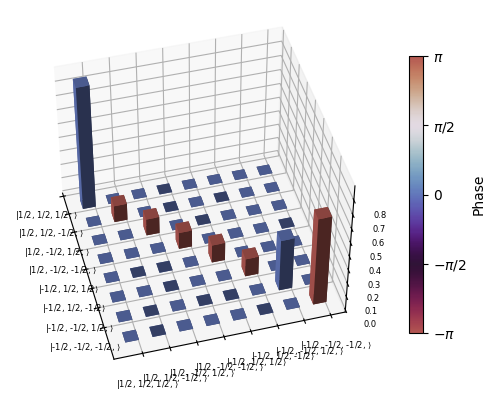

Theoretical rho_transformed_11


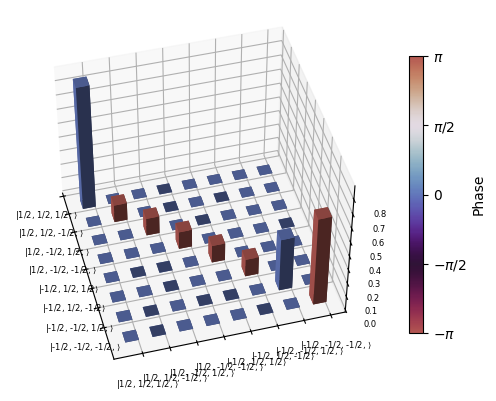

(<Figure size 640x480 with 2 Axes>, <Axes3D: >)

In [8]:
#Step 3
rho_transformed_8 = rho_transformed_7.transform(op.rot_3('y', np.pi/4))

rho_transformed_9 = rho_transformed_8.transform(op.UJ(t = 1 / (2*j23)))
#j12 does NOT work here. But j13 and j23 do

rho_transformed_10 = rho_transformed_9.transform(op.rot_3('y', np.pi/4))
rho_transformed_11 = gradient(rho_transformed_10)
print('Simulated rho_transformed_11')
vis.plot_complex_density_matrix(rho_transformed_11)


print('Theoretical rho_transformed_11')
rho_theoretical_transformation_11 = 1/4*op.I1z + +1/4*op.I2z + 1/2*op.I3z +1/2*op.I1zI2z+2*op.I1zI2zI3z
vis.plot_complex_density_matrix(rho_theoretical_transformation_11)

Simulated rho_transformed_15


Quantum object: dims = [[2, 2, 2], [2, 2, 2]], shape = (8, 8), type = oper, isherm = True
Qobj data =
[[ 0.87940952  0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.         -0.12059048  0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.         -0.12059048  0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.         -0.12059048  0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.         -0.12940952  0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.         -0.12940952
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
  -0.12940952  0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.         -0.12940952]]

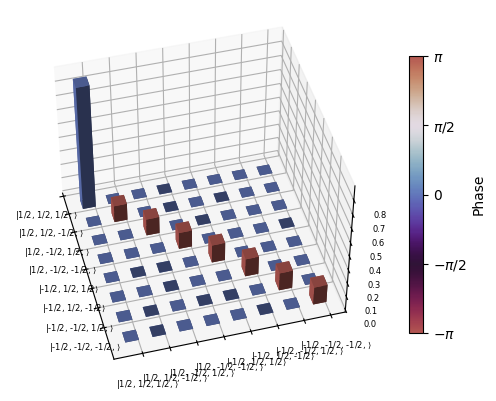

Theoretical rho_transformed_15


Quantum object: dims = [[2, 2, 2], [2, 2, 2]], shape = (8, 8), type = oper, isherm = True
Qobj data =
[[ 0.875  0.     0.     0.     0.     0.     0.     0.   ]
 [ 0.    -0.125  0.     0.     0.     0.     0.     0.   ]
 [ 0.     0.    -0.125  0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.    -0.125  0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.    -0.125  0.     0.     0.   ]
 [ 0.     0.     0.     0.     0.    -0.125  0.     0.   ]
 [ 0.     0.     0.     0.     0.     0.    -0.125  0.   ]
 [ 0.     0.     0.     0.     0.     0.     0.    -0.125]]

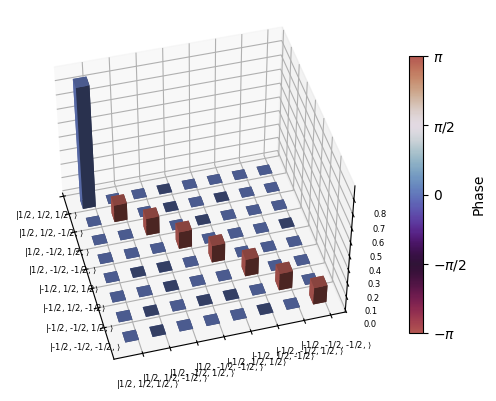

(<Figure size 640x480 with 2 Axes>, <Axes3D: >)

In [9]:
#Step 4
rho_transformed_12 = rho_transformed_11.transform(op.rot_3('y', np.pi/4))
rho_transformed_13 = rho_transformed_12.transform(op.UJ(t = 1 / (4*j23)))
rho_transformed_14 = rho_transformed_13.transform(op.rot_3('x', np.pi/4))
rho_transformed_15 = gradient(rho_transformed_14)
print('Simulated rho_transformed_15')
display(rho_transformed_15)
vis.plot_complex_density_matrix(rho_transformed_15)


print('Theoretical rho_transformed_15')
rho_theoretical_transformation_15 = 1/4*op.I1z + 1/4*op.I2z + 1/4*op.I3z +1/2*op.I1zI2z+1/2*op.I1zI3z+1/2*op.I2zI3z+1*op.I1zI2zI3z
display(rho_theoretical_transformation_15)
vis.plot_complex_density_matrix(rho_theoretical_transformation_15)

### The three qubit state is now in a pseudo pure state. Let us now transform it to a perfect GHZ (Greenberger–Horne–Zeilinger) state. The pdf file explains the pulse sequence to do so.

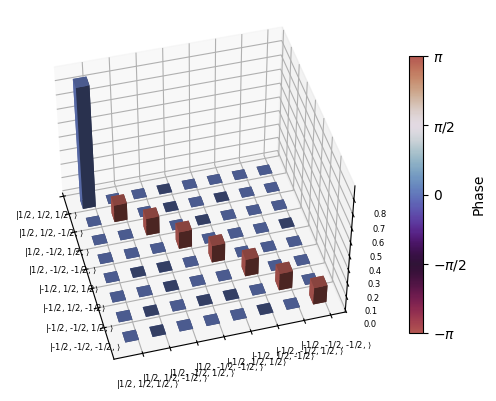

Quantum object: dims = [[2, 2, 2], [2, 2, 2]], shape = (8, 8), type = oper, isherm = True
Qobj data =
[[ 0.875  0.     0.     0.     0.     0.     0.     0.   ]
 [ 0.    -0.125  0.     0.     0.     0.     0.     0.   ]
 [ 0.     0.    -0.125  0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.    -0.125  0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.    -0.125  0.     0.     0.   ]
 [ 0.     0.     0.     0.     0.    -0.125  0.     0.   ]
 [ 0.     0.     0.     0.     0.     0.    -0.125  0.   ]
 [ 0.     0.     0.     0.     0.     0.     0.    -0.125]]

Quantum object: dims = [[2, 2, 2], [2, 2, 2]], shape = (8, 8), type = oper, isherm = True
Qobj data =
[[ 0.37422933+0.00000000e+00j  0.        +0.00000000e+00j
  -0.01961477+0.00000000e+00j  0.        +0.00000000e+00j
   0.        +0.00000000e+00j  0.01961477-3.08108101e-07j
   0.        +0.00000000e+00j  0.49922933-7.84187603e-06j]
 [ 0.        +0.00000000e+00j -0.125     +0.00000000e+00j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j]
 [-0.01961477+0.00000000e+00j  0.        +0.00000000e+00j
  -0.12422933+0.00000000e+00j  0.        +0.00000000e+00j
   0.        +0.00000000e+00j -0.00077067+1.21056021e-08j
   0.        +0.00000000e+00j -0.01961477+3.08108196e-07j]
 [ 0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.        +0.00000000e+00j -0.125     +0.00000000e+00j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.        +0.00000000e

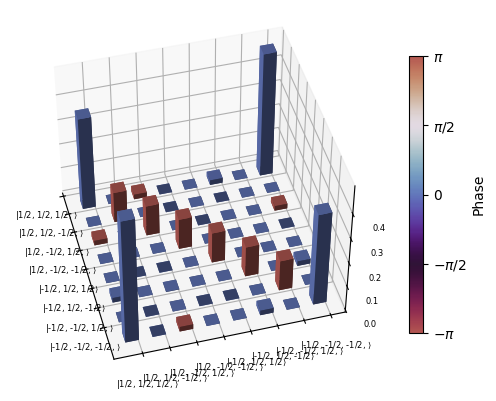

(<Figure size 640x480 with 2 Axes>, <Axes3D: >)

In [25]:
j12 = 100000
j23 = 5000
j13 = 1
op = ThreeSpinOperators(j12=j12, j13=j13, j23=j23)

#Step 5
vis.plot_complex_density_matrix(rho_theoretical_transformation_15)
display(rho_theoretical_transformation_15)
rho_theoretical_transformation_16=rho_theoretical_transformation_15.transform(op.rot_1('y', np.pi/2))

rho_theoretical_transformation_17=rho_theoretical_transformation_16.transform(op.rot_2('y', np.pi/2))
rho_theoretical_transformation_18=rho_theoretical_transformation_17.transform(op.UJ(t = 1 / (2*j12)))
rho_theoretical_transformation_19=rho_theoretical_transformation_18.transform(op.rot_2('x', np.pi/2))


rho_theoretical_transformation_20=rho_theoretical_transformation_19.transform(op.rot_3('y', np.pi/2))
rho_theoretical_transformation_21=rho_theoretical_transformation_20.transform(op.UJ(t = 1 / (2*j13)))
rho_theoretical_transformation_22=rho_theoretical_transformation_21.transform(op.rot_3('x', np.pi/2))
display(rho_theoretical_transformation_22)
vis.plot_complex_density_matrix(rho_theoretical_transformation_22)

In [11]:
#why are there slightly different matrix values? 
#partial answer: it is coming from the y pulses in rho_transformed_1 or rho_transformed_2. The 5*np.pi/12or np.pi/3 seems to be cutting sig figs.

In [12]:
#At end of pulse sequece for psudo pure state |000>, there is mention of additional experimental complexities. 
# such as adding in d1, d2 and 180 spin echo refocusing pulses. d1 and d2 are not needed here because pulses are treated as instant.
#I guess 180 spin echo refocuses are only inportant experimentally because things seem to work here... Perhaps this could help to explain "Major Question" above.

In [18]:
display(op.identity/4)
display(op.I1z)
#op.I1z

Quantum object: dims = [[2, 2, 2], [2, 2, 2]], shape = (8, 8), type = oper, isherm = True
Qobj data =
[[0.25 0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.25 0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.25 0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.25 0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.25 0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.25 0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.25 0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.25]]

Quantum object: dims = [[2, 2, 2], [2, 2, 2]], shape = (8, 8), type = oper, isherm = True
Qobj data =
[[ 0.5  0.   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.5  0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.5  0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.5  0.   0.   0.   0. ]
 [ 0.   0.   0.   0.  -0.5  0.   0.   0. ]
 [ 0.   0.   0.   0.   0.  -0.5  0.   0. ]
 [ 0.   0.   0.   0.   0.   0.  -0.5  0. ]
 [ 0.   0.   0.   0.   0.   0.   0.  -0.5]]

Quantum object: dims = [[2, 2, 2], [2, 2, 2]], shape = (8, 8), type = oper, isherm = True
Qobj data =
[[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]

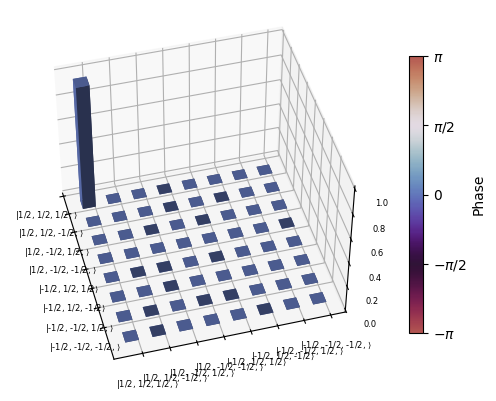

Quantum object: dims = [[2, 2, 2], [2, 2, 2]], shape = (8, 8), type = oper, isherm = True
Qobj data =
[[ 0.49922933+0.00000000e+00j  0.        +0.00000000e+00j
  -0.01961477+0.00000000e+00j  0.        +0.00000000e+00j
   0.        +0.00000000e+00j  0.01961477-3.08108101e-07j
   0.        +0.00000000e+00j  0.49922933-7.84187603e-06j]
 [ 0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j]
 [-0.01961477+0.00000000e+00j  0.        +0.00000000e+00j
   0.00077067+0.00000000e+00j  0.        +0.00000000e+00j
   0.        +0.00000000e+00j -0.00077067+1.21056021e-08j
   0.        +0.00000000e+00j -0.01961477+3.08108196e-07j]
 [ 0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.        +0.00000000e

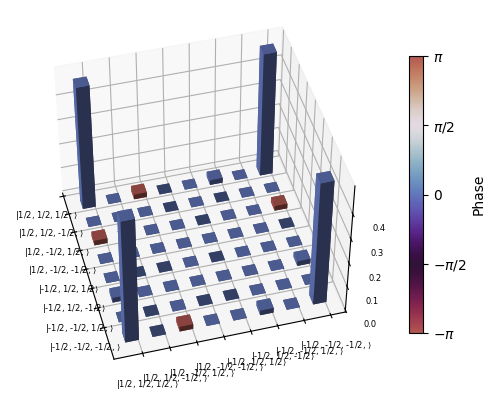

(<Figure size 640x480 with 2 Axes>, <Axes3D: >)

In [14]:
state=rho_theoretical_transformation_15+op.identity/8
display(state)
vis.plot_complex_density_matrix(state)

state=rho_theoretical_transformation_22+op.identity/8
display(state)
vis.plot_complex_density_matrix(state)

In [19]:
op.I1z

Quantum object: dims = [[2, 2, 2], [2, 2, 2]], shape = (8, 8), type = oper, isherm = True
Qobj data =
[[ 0.5  0.   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.5  0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.5  0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.5  0.   0.   0.   0. ]
 [ 0.   0.   0.   0.  -0.5  0.   0.   0. ]
 [ 0.   0.   0.   0.   0.  -0.5  0.   0. ]
 [ 0.   0.   0.   0.   0.   0.  -0.5  0. ]
 [ 0.   0.   0.   0.   0.   0.   0.  -0.5]]

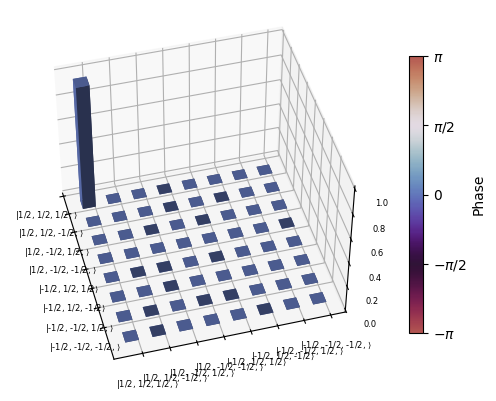

Quantum object: dims = [[2, 2, 2], [2, 2, 2]], shape = (8, 8), type = oper, isherm = True
Qobj data =
[[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


Quantum object: dims = [[2, 2, 2], [2, 2, 2]], shape = (8, 8), type = oper, isherm = True
Qobj data =
[[ 0.49922933+0.00000000e+00j  0.        +0.00000000e+00j
  -0.01961477+0.00000000e+00j  0.        +0.00000000e+00j
   0.        +0.00000000e+00j  0.01961477-3.08108101e-07j
   0.        +0.00000000e+00j  0.49922933-7.84187603e-06j]
 [ 0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j]
 [-0.01961477+0.00000000e+00j  0.        +0.00000000e+00j
   0.00077067+0.00000000e+00j  0.        +0.00000000e+00j
   0.        +0.00000000e+00j -0.00077067+1.21056021e-08j
   0.        +0.00000000e+00j -0.01961477+3.08108196e-07j]
 [ 0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.        +0.00000000e

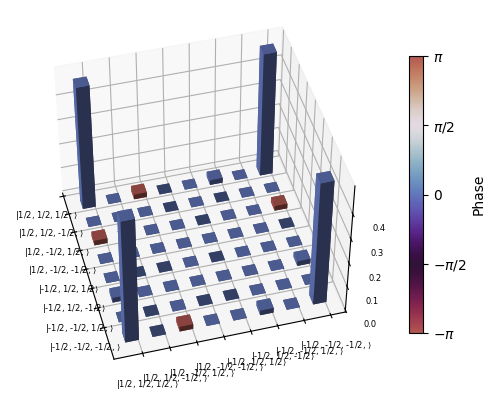

(<Figure size 640x480 with 2 Axes>, <Axes3D: >)

In [29]:
j12 = 100000
j23 = 5000
j13 = 1
op = ThreeSpinOperators(j12=j12, j13=j13, j23=j23)

#Step 5
vis.plot_complex_density_matrix(rho_theoretical_transformation_15+op.identity/8)
print(rho_theoretical_transformation_15+op.identity/8)
rho_theoretical_transformation_16=(rho_theoretical_transformation_15+op.identity/8).transform(op.rot_1('y', np.pi/2))

rho_theoretical_transformation_17=rho_theoretical_transformation_16.transform(op.rot_2('y', np.pi/2))
rho_theoretical_transformation_18=rho_theoretical_transformation_17.transform(op.UJ(t = 1 / (2*j12)))
rho_theoretical_transformation_19=rho_theoretical_transformation_18.transform(op.rot_2('x', np.pi/2))


rho_theoretical_transformation_20=rho_theoretical_transformation_19.transform(op.rot_3('y', np.pi/2))
rho_theoretical_transformation_21=rho_theoretical_transformation_20.transform(op.UJ(t = 1 / (2*j13)))
rho_theoretical_transformation_22=rho_theoretical_transformation_21.transform(op.rot_3('x', np.pi/2))
display(rho_theoretical_transformation_22)
vis.plot_complex_density_matrix(rho_theoretical_transformation_22)